# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


1. ¿How many columns there are?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
icfesdata = pd.read_csv('Saber_11__2019-2.csv')
icfesdata.info()

C:\Users\ynino\AppData\Local\Temp\ipykernel_2848\2341241373.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  icfesdata = pd.read_csv('Saber_11__2019-2.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             546212 non-null  object 
 1   ESTU_NACIONALIDAD              546212 non-null  object 
 2   ESTU_GENERO                    546212 non-null  object 
 3   ESTU_FECHANACIMIENTO           546212 non-null  object 
 4   PERIODO                        546212 non-null  int64  
 5   ESTU_CONSECUTIVO               546212 non-null  object 
 6   ESTU_ESTUDIANTE                546212 non-null  object 
 7   ESTU_TIENEETNIA                546212 non-null  object 
 8   ESTU_PAIS_RESIDE               546212 non-null  object 
 9   ESTU_ETNIA                     546212 non-null  object 
 10  ESTU_DEPTO_RESIDE              545835 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          546212 non-null  object 
 12  ESTU_MCPIO_RESIDE             

In [3]:
datashape = icfesdata.shape
print('The data contains', datashape[0], 'rows and', datashape[1], 'columns.')

The data contains 546212 rows and 82 columns.


2. The type of each column

In [77]:
icfesdata['FAMI_TIENECOMPUTADOR'].value_counts()

Si    295409
No    233827
-       8791
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [4]:
coltypes = dict(icfesdata.dtypes)
#print(coltypes)

In [5]:
# coltypes1 = pd.DataFrame([[key, coltypes[key]] for key in coltypes.keys()], columns=['Columns', 'Type'])
# coltypes1

In [6]:
# coltypes2 = coltypes1.groupby('Type').count()
# print('Of the', datashape[1], 'columns, we have the following number of columns per type of data')
# print(coltypes2)

In [7]:
# coltypesobj = coltypes1[coltypes1['Type'] == object] 
# coltypesint = coltypes1[coltypes1['Type'] == 'int64'] 
# coltypesflt = coltypes1[coltypes1['Type'] == 'float64'] 
# coltypesflt

In [8]:
coltypesobj = icfesdata.select_dtypes(['float64'])
coltypesint = icfesdata.select_dtypes(['int64'])
coltypesflt = icfesdata.select_dtypes(['object'])

3. The different values that a column can take

In [9]:
cols = list(icfesdata.columns)
#print(cols)

In [10]:
for i in cols:
    colvalues = icfesdata[i].value_counts()
    #print(colvalues)

In this part I had some difficulties, because I didn't know how to count the occurrences of each column to know which values were registered in a single instruction. I tried with several functions and cycles, some worked but I got a matrix with a million rows because I counted the values of all the columns in each column, others didn't work and this was the simplest way I could think of but I can't observe the data in such an efficient way, so I must improve it.

I also had the possibility to do it individually for the 82 columns but I decided to do it thinking about the following question.

In [11]:
#col1 = icfesdata['PUNT_GLOBAL'].value_counts()
#col2 = icfesdata['PERCENTIL_GLOBAL'].value_counts()
#col3 = icfesdata['COLE_NATURALEZA'].value_counts()
#col4 = icfesdata['ESTU_TIPOREMUNERACION'].value_counts()
#col5 = icfesdata['FAMI_TIENECOMPUTADOR'].value_counts()
#col6 = icfesdata['FAMI_TIENEINTERNET'].value_counts()
#col7 = icfesdata['FAMI_ESTRATOVIVIENDA'].value_counts()
#col8 = icfesdata['ESTU_DEPTO_RESIDE'].value_counts()
#col9 = icfesdata['ESTU_GENERO'].value_counts()

4. If we look at the overall score, the most important columns are the overall score and overall percentile, along with other columns with which we want to correlate them. These would be the gender, the stratum, whether the student works, whether the student has a computer and whether the student has access to the Internet, if the school is public or private and the department of residence.


In [12]:
icfesdata['PUNT_GLOBAL'].describe()

count    546212.000000
mean        246.186464
std          51.386858
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

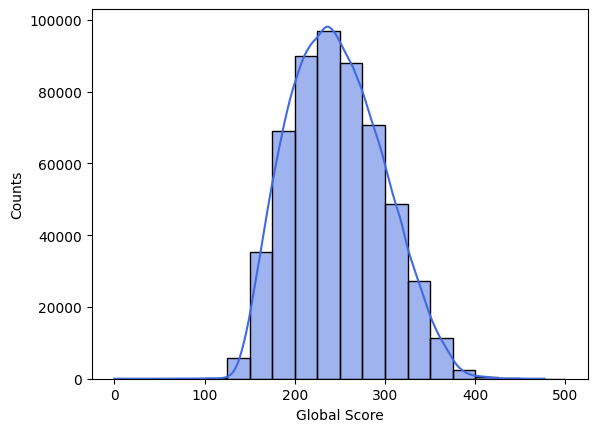

In [13]:
fig1 = sns.histplot(data=icfesdata, x='PUNT_GLOBAL', binwidth=25, kde=True, color='royalblue')
fig1.set(xlabel="Global Score", ylabel = "Counts")
plt.show()

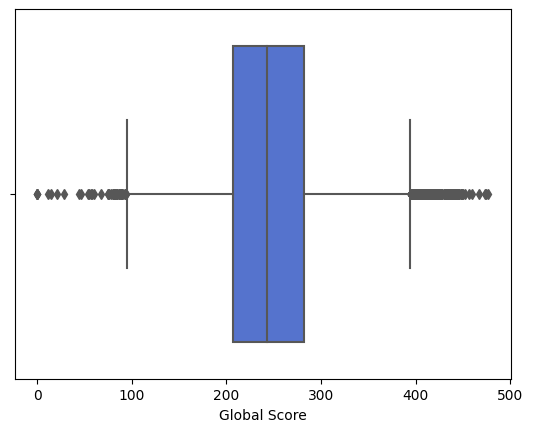

In [14]:
fig2 = sns.boxplot(x=icfesdata["PUNT_GLOBAL"], color='royalblue')
fig2.set(xlabel="Global Score")
plt.show()

In [15]:
colnat=icfesdata['COLE_NATURALEZA'].value_counts()
colnat

OFICIAL       416011
NO OFICIAL    130201
Name: COLE_NATURALEZA, dtype: int64

In [16]:
colnat1 = icfesdata.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colnat1)

NO OFICIAL    263.390788
OFICIAL       240.801943
dtype: float64


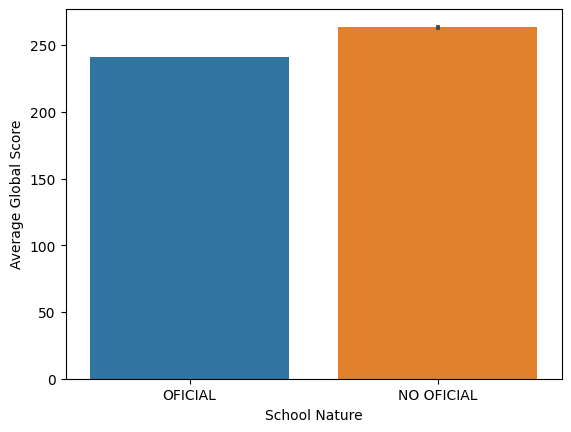

In [17]:
fig3 = sns.barplot(data=icfesdata, x="COLE_NATURALEZA", y="PUNT_GLOBAL")
fig3.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [18]:
colpuntmat = icfesdata.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntmat)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average maths score')

NO OFICIAL    53.796561
OFICIAL       49.607893
dtype: float64


In [19]:
colpunteng = icfesdata.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpunteng)
#colpunteng.plot.bar(xlabel='Nature of the school', ylabel='Average english score')

NO OFICIAL    54.112326
OFICIAL       46.632152
dtype: float64


In [20]:
colpuntsoc = icfesdata.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntsoc)
#colpuntsoc.plot.bar(xlabel='Nature of the school', ylabel='Average social sciences score')

NO OFICIAL    49.958879
OFICIAL       45.055849
dtype: float64


In [21]:
colpuntlec = icfesdata.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntlec)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average critical reading score')

NO OFICIAL    55.191243
OFICIAL       51.207759
dtype: float64


In [22]:
colpuntcnat = icfesdata.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntcnat)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average natural sciences score')

NO OFICIAL    51.288055
OFICIAL       47.279180
dtype: float64


# Insights

+ The overall score has a Gaussian distribution with a mean of 246.18 and a standard deviation of 51.38 points. 
+ In 2019, the maximum score was 477 and the minimum score was 0.
+ Of the 546212 students who took the exam 416011 belong to public or official institutions and 130201 belong to private or unofficial institutions.
+ The average global score in the public institutions was below the average with 240.80 points, while the average global score in the private institutions was 263.39 points. So there's a difference of 8.57% between the average global scores of private and public institutions.
+ Five areas of knowledge are evaluated: mathematics, English, critical reading, natural sciences and social sciences. In all five areas, the average score is higher in private institutions. The area with the greatest percentage difference is English, with 13.8% between private and public institutions.


# Data Cleaning

The following columns with different codes are irrelevant.

In [23]:
icfesdata1 = icfesdata.drop(['ESTU_TIPODOCUMENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 
                             'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'COLE_CODIGO_ICFES',
                             'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE','COLE_COD_MCPIO_UBICACION',
                             'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
                             'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
                             'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL','ESTU_ESTADOINVESTIGACION'],
                            axis=1)

In [24]:
icfesdata1.info()
#icfesdata1 is the dataframe without irrelevant columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              546212 non-null  object 
 1   ESTU_GENERO                    546212 non-null  object 
 2   ESTU_FECHANACIMIENTO           546212 non-null  object 
 3   ESTU_TIENEETNIA                546212 non-null  object 
 4   ESTU_PAIS_RESIDE               546212 non-null  object 
 5   ESTU_ETNIA                     546212 non-null  object 
 6   ESTU_DEPTO_RESIDE              545835 non-null  object 
 7   ESTU_MCPIO_RESIDE              545835 non-null  object 
 8   FAMI_ESTRATOVIVIENDA           546186 non-null  object 
 9   FAMI_PERSONASHOGAR             537749 non-null  object 
 10  FAMI_CUARTOSHOGAR              539794 non-null  object 
 11  FAMI_EDUCACIONPADRE            537920 non-null  object 
 12  FAMI_EDUCACIONMADRE           

Looking for missing values in columns and rows.

In [25]:
missing_columns=icfesdata1.isnull().sum()
missing_rows=icfesdata1.isnull().sum(axis = 1)

In [26]:
icfesdata1.isnull().any(axis=1).sum()

56651

We could directly delete these 56651 rows which are equivalent to 10.37% of the dataset rows, but for example for the column 'ESTU_DEDICACIONINTERNET' you could replace some NaN by -.

In [27]:
icfesdata1['ESTU_DEDICACIONINTERNET'].value_counts()

Entre 1 y 3 horas        157557
Entre 30 y 60 minutos    134383
Más de 3 horas           100134
30 minutos o menos        90517
No Navega Internet        30697
-                          2626
Name: ESTU_DEDICACIONINTERNET, dtype: int64

In [28]:
icfesdata2=icfesdata1.replace({'ESTU_DEDICACIONINTERNET':{np.nan:'-'}})
#icfesdata2 is the dataframe with replacement in one column 'ESTU_DEDICACIONINTERNET'

In [29]:
icfesdata2['ESTU_DEDICACIONINTERNET'].value_counts()

Entre 1 y 3 horas        157557
Entre 30 y 60 minutos    134383
Más de 3 horas           100134
30 minutos o menos        90517
-                         32924
No Navega Internet        30697
Name: ESTU_DEDICACIONINTERNET, dtype: int64

Finally, I delete 56557 rows.

In [30]:
icfesready=icfesdata2.dropna()
#icfesready is the dataframe eliminating 10,37% of the columns

And check that there isn´t missing values.

In [31]:
icfesready.isnull().any(axis=1).sum()

0

BACK TO DATA CLEANING :(

In [32]:
icfesdata1['FAMI_TIENECOMPUTADOR'].value_counts()

Si    295409
No    233827
-       8791
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [33]:
icfesdata1['FAMI_TIENEINTERNET'].value_counts()

Si    314042
No    201199
-      22634
Name: FAMI_TIENEINTERNET, dtype: int64

In [34]:
icfesdata3=icfesdata1.replace({'ESTU_DEDICACIONINTERNET':{np.nan:'-'}, 'FAMI_COMECEREALFRUTOSLEGUMBRE':{np.nan:'-'},
                              'FAMI_COMELECHEDERIVADOS':{np.nan:'-'},'FAMI_TIENESERVICIOTV':{np.nan:'-'},
                              'FAMI_EDUCACIONMADRE':{np.nan:'-'},'ESTU_TIPOREMUNERACION':{np.nan:'-'},
                              'COLE_CARACTER':{np.nan:'-'},'FAMI_COMECARNEPESCADOHUEVO':{np.nan:'-'},
                              'ESTU_DEDICACIONLECTURADIARIA':{np.nan:'-'},'FAMI_NUMLIBROS':{np.nan:'-'},
                              'FAMI_TIENEHORNOMICROOGAS':{np.nan:'-'},'FAMI_PERSONASHOGAR':{np.nan:'-'},
                              'FAMI_TIENEINTERNET':{np.nan:'-'},'FAMI_EDUCACIONPADRE':{np.nan:'-'},
                              'FAMI_SITUACIONECONOMICA':{np.nan:'-'},'FAMI_TIENEAUTOMOVIL':{np.nan:'-'},
                              'FAMI_TIENECOMPUTADOR':{np.nan:'-'},'FAMI_TRABAJOLABORPADRE':{np.nan:'-'},
                              'FAMI_TIENECONSOLAVIDEOJUEGOS':{np.nan:'-'},'FAMI_TIENELAVADORA':{np.nan:'-'},
                              'FAMI_CUARTOSHOGAR':{np.nan:'-'},'FAMI_TIENEMOTOCICLETA':{np.nan:'-'},
                              'FAMI_TRABAJOLABORMADRE':{np.nan:'-'}, 'ESTU_HORASSEMANATRABAJA':{np.nan:'-'}}
                              )

In [35]:
icfesdata3.isnull().any(axis=1).sum()
#icfesdata3 is the dataframe without irrelevant columns and replacement of nan to - in
#24 columns type obj that represents socioeconomical variables

396

In [36]:
missing_columns1 = icfesdata3.isnull().sum()

Despues de estos reemplazos, las únicas columnas con valores nulos son ESTU_DEPTO_RESIDE, ESTU_MCPIO_RESIDE y PUNT_INGLES. Son 396 filas que equivalen al 0,07% del dataframe.

In [37]:
icfesclean=icfesdata3.dropna()
#icfesclean is the dataframe without missing values after 
#replacement in 24 columns and eliminating 0,07% of the rows

In [38]:
icfesclean.isnull().any(axis=1).sum()

0

# Data Exploration with ready dataset

In [78]:
icfesready['PUNT_GLOBAL'].describe()

count    489655.000000
mean        248.414847
std          50.969646
min         108.000000
25%         210.000000
50%         245.000000
75%         284.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

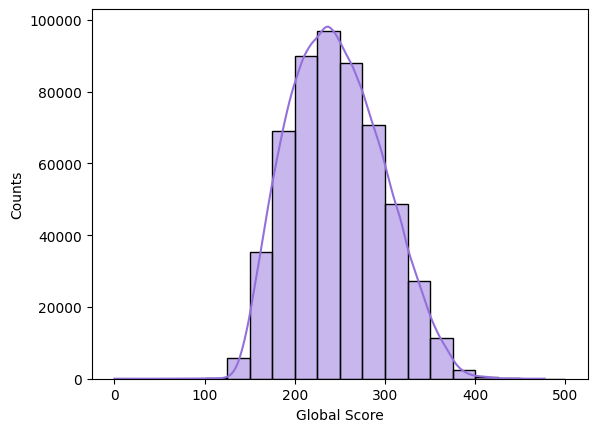

In [79]:
fig1 = sns.histplot(data=icfesdata, x='PUNT_GLOBAL', binwidth=25, kde=True, color='mediumpurple')
fig1.set(xlabel="Global Score", ylabel = "Counts")
plt.show()

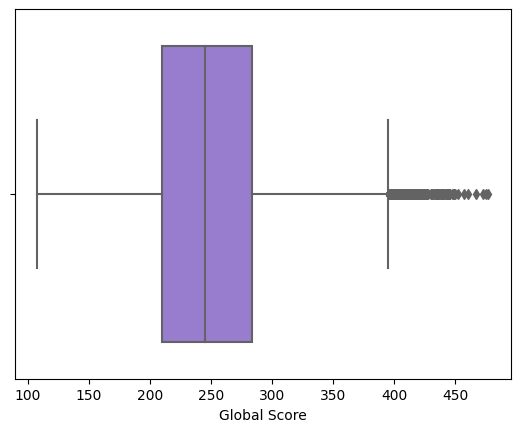

In [80]:
fig2 = sns.boxplot(x=icfesready["PUNT_GLOBAL"], color='mediumpurple')
fig2.set(xlabel="Global Score")
plt.show()

In [42]:
# colnat=icfesready['COLE_NATURALEZA'].value_counts()
# colnat

In [43]:
# colnat1 = icfesready.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colnat1)

In [44]:
# fig3 = sns.barplot(data=icfesready, x="COLE_NATURALEZA", y="PUNT_GLOBAL")
# fig3.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [45]:
# colpuntmat = icfesready.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntmat)

In [46]:
# colpunteng = icfesready.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpunteng)

In [47]:
# colpuntlec = icfesready.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntlec)

In [48]:
# colpuntsoc = icfesready.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntsoc)

In [49]:
# colpuntcnat = icfesready.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntcnat)

In [50]:
# fig4 = sns.barplot(data=icfesready, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", hue="FAMI_TIENECOMPUTADOR")
# fig4.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [51]:
# fig5 = sns.barplot(data=icfesready, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", hue="FAMI_TIENEINTERNET")
# fig5.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [52]:
# sns.histplot(data=icfesready, x="FAMI_TIENECOMPUTADOR", hue="COLE_NATURALEZA", multiple="stack")

In [53]:
# icfesdatanum=icfesready.select_dtypes(['int64'])

In [54]:
# corr = icfesready.corr()
# plt.subplots(figsize=(15,10))
# sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

By deleting 56557 rows, the lower overall scores from 0 to 107 were deleted.

In [55]:
icfescero=icfesdata1[icfesdata1['PUNT_GLOBAL'] <= 107]
datashape = icfescero.shape
print('The data contains', datashape[0], 'rows and', datashape[1], 'columns.')

The data contains 96 rows and 63 columns.


¡GO BACK TO DATA CLEANING!

# Data exploring with clean dataset

In [56]:
icfesclean['PUNT_GLOBAL'].describe()

count    545816.000000
mean        246.185539
std          51.385127
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

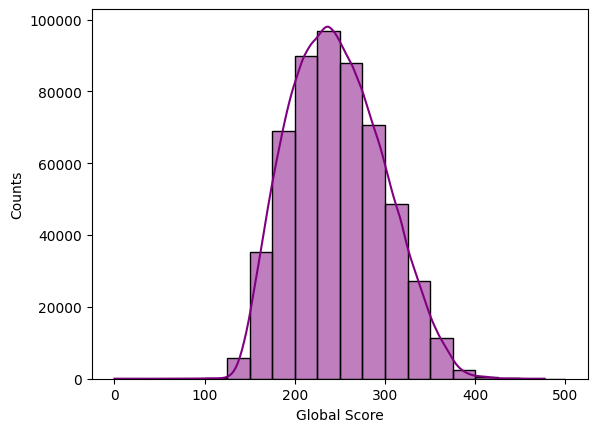

In [57]:
fig1 = sns.histplot(data=icfesclean, x='PUNT_GLOBAL', binwidth=25, kde=True, color='purple')
fig1.set(xlabel="Global Score", ylabel = "Counts")
plt.show()

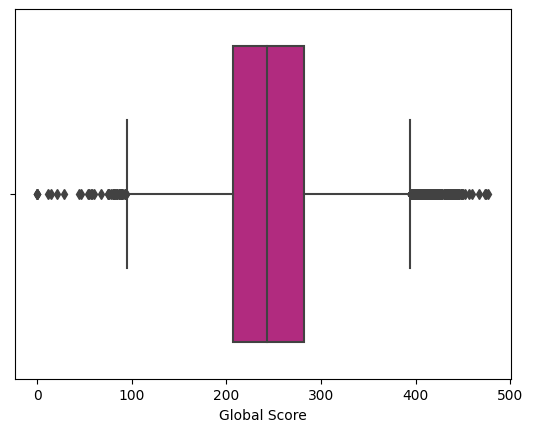

In [58]:
fig2 = sns.boxplot(x=icfesclean["PUNT_GLOBAL"], color='mediumvioletred')
fig2.set(xlabel="Global Score")
plt.show()

In [59]:
colnat=icfesclean['COLE_NATURALEZA'].value_counts()
colnat

OFICIAL       415760
NO OFICIAL    130056
Name: COLE_NATURALEZA, dtype: int64

In [60]:
colnat1 = icfesclean.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colnat1)

NO OFICIAL    263.373262
OFICIAL       240.808959
dtype: float64


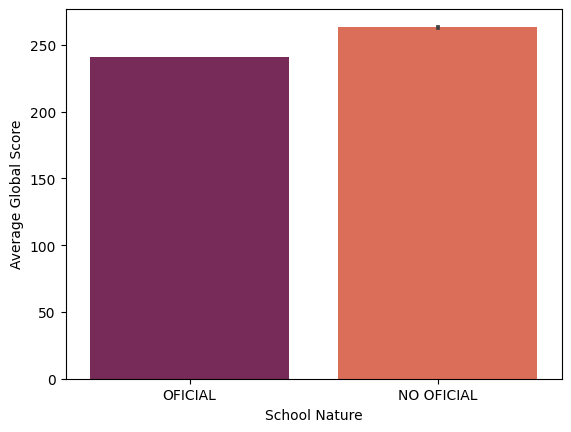

In [61]:
fig3 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA", y="PUNT_GLOBAL", palette='rocket')
fig3.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [62]:
colpuntmat = icfesclean.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntmat)

NO OFICIAL    53.792389
OFICIAL       49.609207
dtype: float64


In [63]:
colpunteng = icfesclean.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpunteng)

NO OFICIAL    54.105039
OFICIAL       46.634556
dtype: float64


In [64]:
colpuntlec = icfesclean.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntlec)

NO OFICIAL    55.188496
OFICIAL       51.209448
dtype: float64


In [65]:
colpuntsoc = icfesclean.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntsoc)

NO OFICIAL    49.956188
OFICIAL       45.057141
dtype: float64


In [66]:
colpuntcnat = icfesclean.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntcnat)

NO OFICIAL    51.285008
OFICIAL       47.280660
dtype: float64


In [67]:
puntajes = icfesclean[{'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL'}]

C:\Users\ynino\AppData\Local\Temp\ipykernel_2848\2369097394.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  puntajes = icfesclean[{'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',


<Axes: >

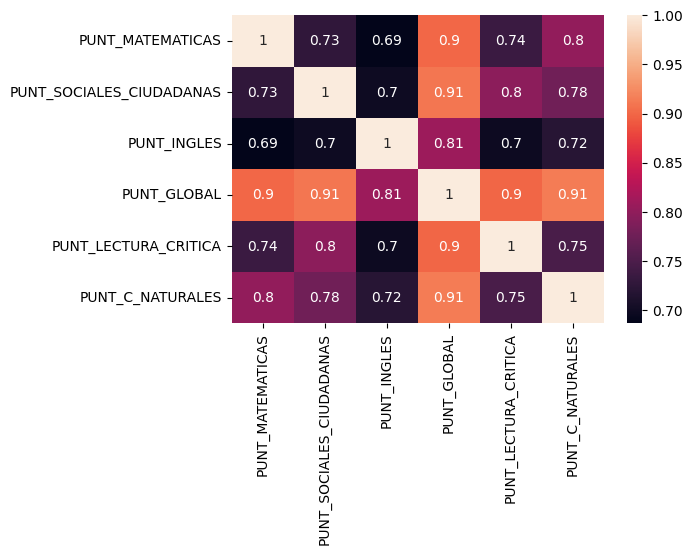

In [68]:
corr = puntajes.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap='rocket')

In [69]:
icfesclean.groupby('COLE_NATURALEZA')['FAMI_TIENECOMPUTADOR'].value_counts()

COLE_NATURALEZA  FAMI_TIENECOMPUTADOR
NO OFICIAL       Si                       96069
                 No                       29559
                 -                         4428
OFICIAL          No                      204109
                 Si                      199119
                 -                        12532
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [70]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_TIENECOMPUTADOR'])['PUNT_GLOBAL'].mean()
#/icfesclean['COLE_NATURALEZA'].value_counts()


COLE_NATURALEZA  FAMI_TIENECOMPUTADOR
NO OFICIAL       -                       234.624435
                 No                      230.770831
                 Si                      274.729632
OFICIAL          -                       228.619454
                 No                      230.002200
                 Si                      252.653715
Name: PUNT_GLOBAL, dtype: float64

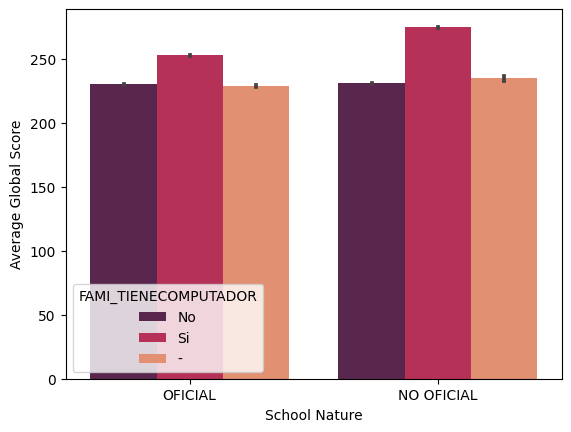

In [71]:
fig4 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", 
                   hue="FAMI_TIENECOMPUTADOR", palette='rocket')
fig4.set(xlabel="School Nature", ylabel="Average Global Score")
#for i in fig4.containers:
#    fig4.bar_label(i,)
plt.show()

In [72]:
icfesclean.groupby('COLE_NATURALEZA')['FAMI_TIENEINTERNET'].value_counts()

COLE_NATURALEZA  FAMI_TIENEINTERNET
NO OFICIAL       Si                    102149
                 No                     20336
                 -                       7571
OFICIAL          Si                    211671
                 No                    180722
                 -                      23367
Name: FAMI_TIENEINTERNET, dtype: int64

In [73]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_TIENEINTERNET'])['PUNT_GLOBAL'].mean()

COLE_NATURALEZA  FAMI_TIENEINTERNET
NO OFICIAL       -                     224.713116
                 No                    227.703924
                 Si                    273.339759
OFICIAL          -                     218.916549
                 No                    229.811927
                 Si                    252.614855
Name: PUNT_GLOBAL, dtype: float64

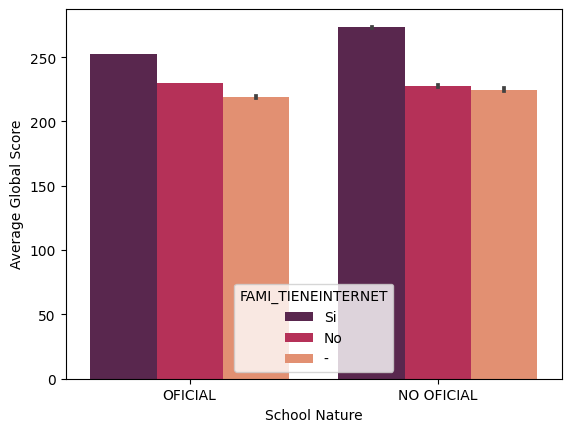

In [74]:
fig5 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", 
                   hue="FAMI_TIENEINTERNET", palette='rocket')
fig5.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [75]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_ESTRATOVIVIENDA'])['PUNT_GLOBAL'].mean()

COLE_NATURALEZA  FAMI_ESTRATOVIVIENDA
NO OFICIAL       -                       226.099536
                 Estrato 1               231.872271
                 Estrato 2               255.839149
                 Estrato 3               276.027031
                 Estrato 4               294.051860
                 Estrato 5               296.098502
                 Estrato 6               293.055205
                 Sin Estrato             214.251136
OFICIAL          -                       219.839848
                 Estrato 1               236.488609
                 Estrato 2               248.254194
                 Estrato 3               253.022874
                 Estrato 4               234.992013
                 Estrato 5               216.139816
                 Estrato 6               201.407305
                 Sin Estrato             205.552353
Name: PUNT_GLOBAL, dtype: float64

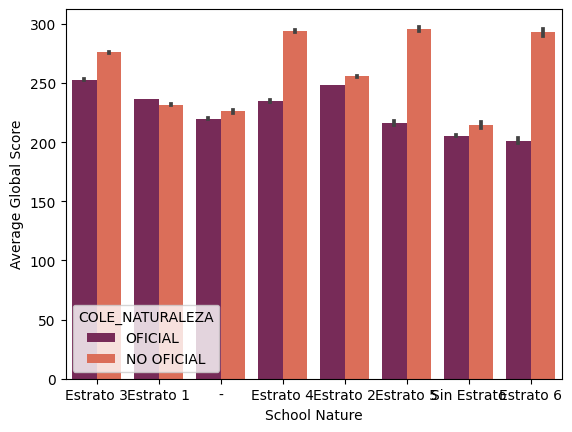

In [76]:
fig6 = sns.barplot(data=icfesclean, x="FAMI_ESTRATOVIVIENDA",  y="PUNT_GLOBAL", 
                   hue="COLE_NATURALEZA", palette='rocket')
fig6.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

# Insights

For the Saber 11 tests, 2019, calendar A.
+ The overall score of the Saber 11 tests has a normal distribution, with a mean of 246 points and a standard deviation of 51 points.
+ The minimum score was 0 points and the maximum was 477 points.
+ Of the 545816 records (students) kept, 415760 belonged to public institutions and 130056 to private institutions.
+ The average score in the public institutions was 241 points, below the average.
+ The average score in private institutions was 263 points.
+ Of the five areas evaluated: mathematics, critical reading, social and citizenship sciences, natural sciences and English, the one with the greatest difference between public and private institutions was English, with 54 and 47 points on average, respectively.
+ Taking into account whether the student's family has a computer:
Of the 130056 students in private institutions 74% have a computer, 23% do not and 3% do not answer.
Of the 415760 students in public institutions, 48% have a computer, 49% do not have one and 3% do not respond.
+ Among students in private institutions, there is a difference of 44 points in the average global score between students who do (275) and those who do not (231) have a computer.
+ In students in public institutions there is a difference of 23 points in the average global score between students who do (253) and those who do not (230) have a computer.
+ Taking into account whether the student's family has internet:
Of the 130056 students in private institutions 78% have internet, 16% do not and 6% do not respond.
Of the 415760 students in public institutions 51% have internet, 43% do not and 6% do not respond.
+ Among students in private institutions there is a difference of 46 points in the average global score between students who do (274) and those who do not (228) have internet.
+ Among students in public institutions, there is a difference of 23 points in the average global score between students who do (253) and those who do not (230) have internet.



POSTPANDEMIC
+ In 2020 A (PANDEMIA) the mean was 248, standard deviation 48. Minimum score 0 and maximum score 500.
+ The difference between public (241) and private (271) schools was 30 points.
+ For students in private institutions there is a difference of 44 points in the average global score between students who do (275) and those who do not (231) have a computer.
+ For students in public institutions, there is a difference of 23 points in the average global score between students who do (253) and those who do not (230) have a computer.
+ Taking into account whether the student's family has a computer:
Of the 111381 students in private institutions 81% have computer, 15% do not have and 4% do not respond.
Of the 39,0047 students in public institutions, 52% have a computer, 44% do not have one and 4% do not respond.
+ Among students in private institutions, there is a difference of 45 points in the average global score between students who do (279) and those who do not (234) have a computer.
+ In students in public institutions there is a difference of 23 points in the average global score between students who do (253) and those who do not (230) have a computer.
+ Taking into account whether the student's family has internet:
Of the 111381 students in private institutions 88% have internet, 9% do not and 3% do not respond.
Of the 390047 students in public institutions 62% have internet, 35% do not and 3% do not respond.
+ Among students in private institutions there is a difference of 47 points in the average global score between students who do (276) and those who do not (229) have internet.
+ Among students in public institutions, there is a difference of 25 points in the average global score between students who do (251) and those who do not (226) have internet.
